In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Analyze data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

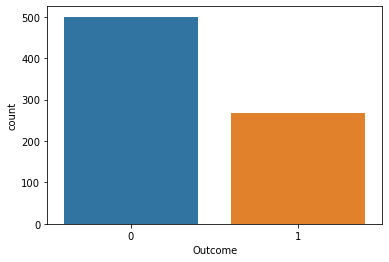

In [11]:
sns.countplot(x="Outcome",data = data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

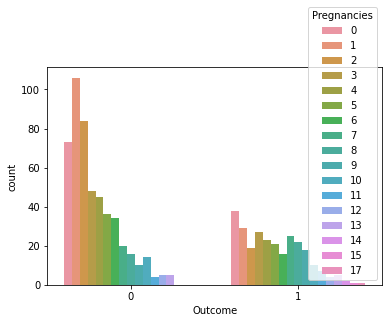

In [22]:
sns.countplot(x="Outcome", hue ="Pregnancies", data = data)

<AxesSubplot:ylabel='Frequency'>

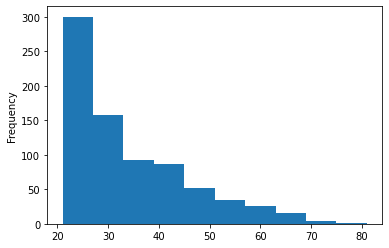

In [16]:
data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

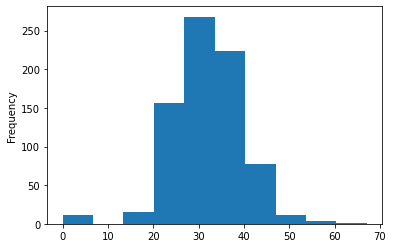

In [17]:
data["BMI"].plot.hist()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

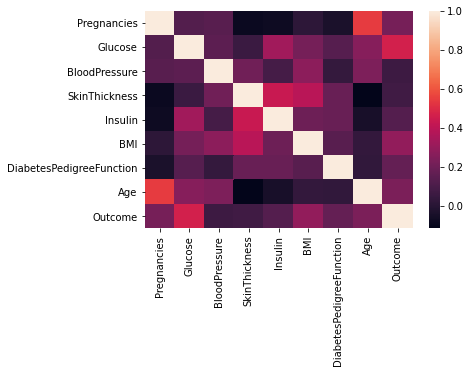

In [23]:
sns.heatmap(data.corr())
corr = data.corr()
print(corr)


## Train


In [45]:
x = data.drop(["Outcome","BloodPressure"],axis =1)
y = data["Outcome"]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 0)

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [48]:
prediction = logmodel.predict(x_test)

In [49]:
score = logmodel.score(x_test,y_test)
score
#to check accuracy

0.7748917748917749

In [50]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[142,  15],
       [ 37,  37]], dtype=int64)

In [51]:
coeff = list(diabetesCheck.coef_[0])
labels = list(trainData.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

NameError: name 'diabetesCheck' is not defined